# LAB 6 - kNN on the Iris data set

### This dataset consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

### The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

#### Divide the iris data into training and testing sets using sklearn.model_selection.train_test_split

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
train_X, test_X, train_y, test_y = train_test_split(iris.data, iris.target, stratify = iris.target, random_state = 0)
iris_df = pd.read_csv('IRIS.csv')
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### Use Matplotlib to make scatter plots of different feature pairings, coloring the points by their targets (labels: setosa, versicolor, virginica). When you submit, show the plot that you think best differentiates the classes. Alternatively, you can recreate the Seaborn pairplot that we created for this data in the supervized_learning.ipynb notebook.

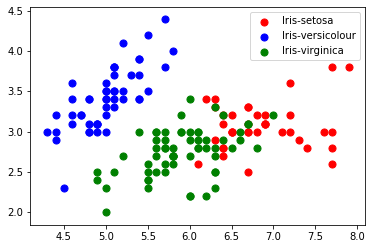

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


x = iris_df.iloc[:, [0,1,2,3]].values


kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 50, c = 'green', label = 'Iris-virginica')

plt.legend()

#### Use your kNN class to train only using the training dataset and classify the flowers in the test dataset by species.  Use sklearn.metrics.accuracy_score to compare the predicted labels to the known labels for the testing set.  Plot and interpret the accuracy vs k for odd values of k = 1 to 11. 

In [33]:
import knn
from sklearn.metrics import accuracy_score

model_predictions = []
for i in range(1,12):
    model = knn.KNN(i)
    model.fit(train_X, train_y)
    predictions = model.predict_loop(test_X)
    model_predictions.append(accuracy_score(test_y, predictions, normalize=True))
    
    
print(model_predictions)

    

[0.9736842105263158, 0.9736842105263158, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0.5, 1.0, 'Model Predictions')

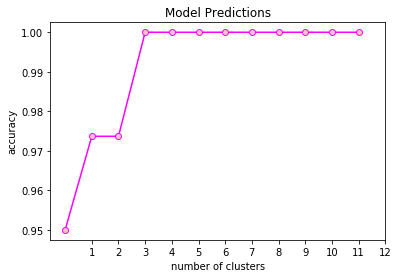

In [34]:
import matplotlib.pyplot as plt

model_predictions = [0.95] + model_predictions # filler value
plt.plot(model_predictions, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(1,len(model_predictions)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('accuracy') #set the label for y axis
plt.xlabel('number of clusters') #set the label for x-axis
plt.title("Model Predictions") #set the title of the graph
